<a href="https://colab.research.google.com/github/Azyur-i/ITS105-EnergyEfficiency/blob/main/ITS105_EnergyEfficiencyMLModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing and Loading the Libraries and Dataset


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import files

uploaded = files.upload()
df = pd.read_csv('dataset.csv')

print("Check dataset:")
df.head()

Saving dataset.csv to dataset (2).csv
Check dataset:


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


# Data Preprocessing

In [ ]:
X = df.drop(columns=['Heating_Load', 'Cooling_Load'])

y = df[['Heating_Load', 'Cooling_Load']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

Training set size: 230 samples
Testing set size: 538 samples


# Model Training

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Model Evaluation

In [ ]:
y_pred = rf_model.predict(X_test)

print("--- HEATING LOAD REGRESSION METRICS ---")
print(f"Mean Squared Error: {mean_squared_error(y_test['Heating_Load'], y_pred[:, 0]):.4f}")
print(f"R2 Score: {r2_score(y_test['Heating_Load'], y_pred[:, 0]):.4f}")

print("\n" + "="*50 + "\n")

print("--- COOLING LOAD REGRESSION METRICS ---")
print(f"Mean Squared Error: {mean_squared_error(y_test['Cooling_Load'], y_pred[:, 1]):.4f}")
print(f"R2 Score: {r2_score(y_test['Cooling_Load'], y_pred[:, 1]):.4f}")

--- HEATING LOAD REGRESSION METRICS ---
Mean Squared Error: 0.4795
R2 Score: 0.9954


--- COOLING LOAD REGRESSION METRICS ---
Mean Squared Error: 4.2157
R2 Score: 0.9546


# Model Visualization

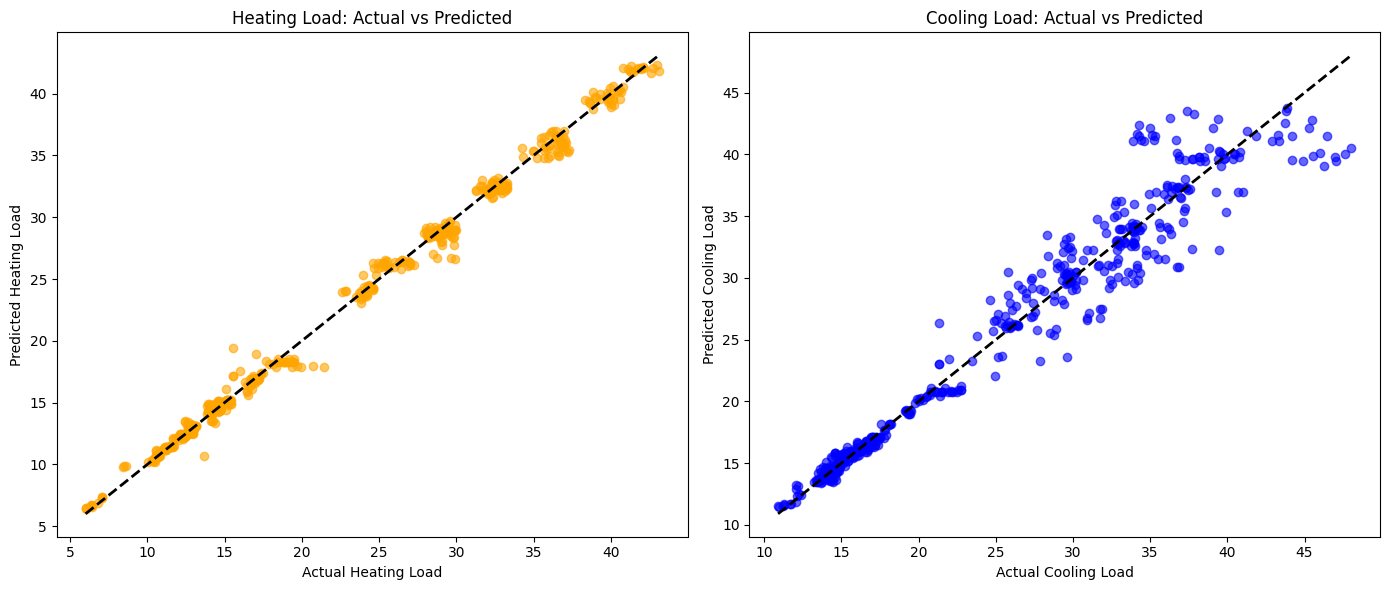

In [ ]:
y_pred_reg = rf_model.predict(X_test)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test['Heating_Load'], y_pred_reg[:, 0], alpha=0.6, color='orange')
plt.plot([y_test['Heating_Load'].min(), y_test['Heating_Load'].max()],
         [y_test['Heating_Load'].min(), y_test['Heating_Load'].max()], 'k--', lw=2)
plt.title('Heating Load: Actual vs Predicted')
plt.xlabel('Actual Heating Load')
plt.ylabel('Predicted Heating Load')

plt.subplot(1, 2, 2)
plt.scatter(y_test['Cooling_Load'], y_pred_reg[:, 1], alpha=0.6, color='blue')
plt.plot([y_test['Cooling_Load'].min(), y_test['Cooling_Load'].max()],
         [y_test['Cooling_Load'].min(), y_test['Cooling_Load'].max()], 'k--', lw=2)
plt.title('Cooling Load: Actual vs Predicted')
plt.xlabel('Actual Cooling Load')
plt.ylabel('Predicted Cooling Load')

plt.tight_layout()
plt.show()

# Which Features Contribute the Most?

/tmp/ipython-input-1025987886.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


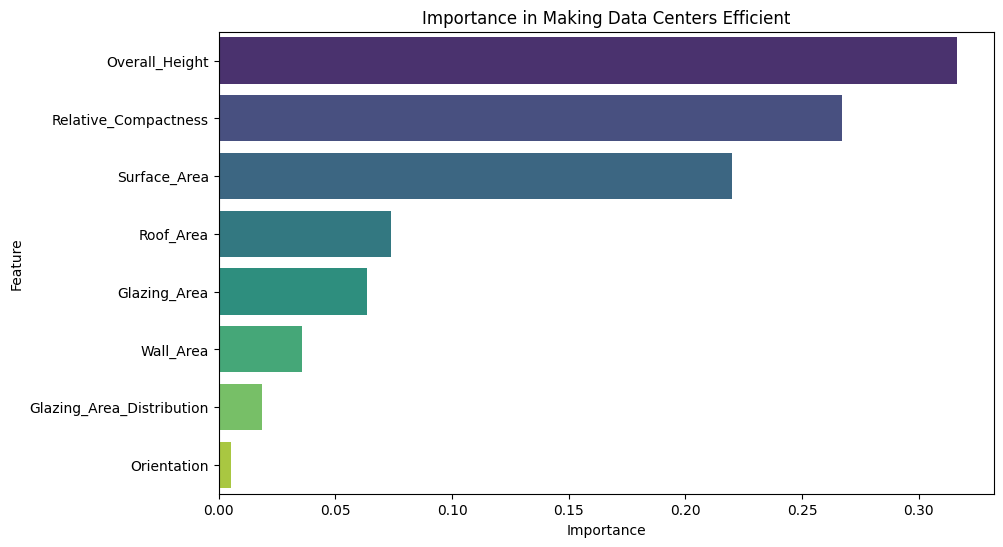

                     Feature  Importance
4             Overall_Height    0.316213
0       Relative_Compactness    0.267028
1               Surface_Area    0.219896
3                  Roof_Area    0.073736
6               Glazing_Area    0.063612
2                  Wall_Area    0.035808
7  Glazing_Area_Distribution    0.018625
5                Orientation    0.005081


In [ ]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', legend=False)
plt.title('Importance in Making Data Centers Efficient')
plt.show()

print(feature_importance_df)